# Introducing image processing and scikit image

In [1]:
# Import the modules from skimage
from skimage import data, color
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

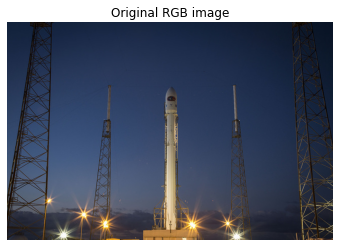

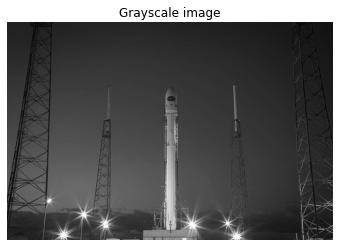

In [3]:
# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

## NumPy for images

In [4]:
# Loading the image using Matplotlib
flipped_seville = plt.imread('data/sevilleup(2).jpg')
type(flipped_seville)

numpy.ndarray

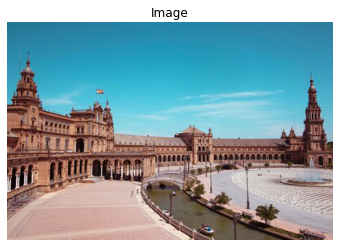

In [5]:
# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)
show_image(seville_vertical_flip)

In [6]:
# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

# Flip the previous image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

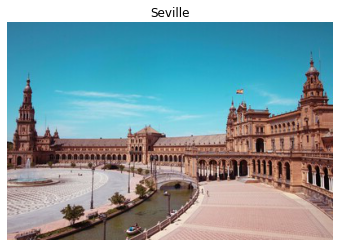

In [7]:
# Show the resulting image
show_image(seville_horizontal_flip, 'Seville')

In [8]:
image = plt.imread('data/4.1.01.jpg')

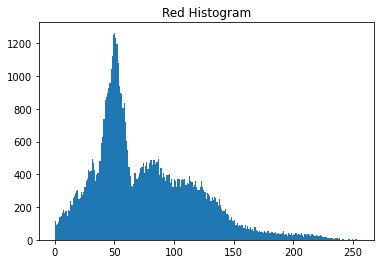

In [9]:
# Obtain the red channel
red_channel = image[:, :, 0]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256)

# Set title and show
plt.title('Red Histogram')
plt.show()

## Thresholding

In [10]:
chess_pieces_image = plt.imread('data/bw.jpg')

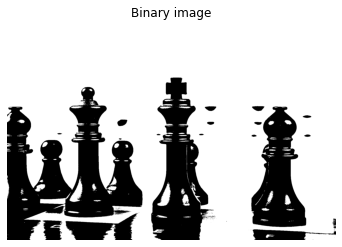

In [11]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

In [12]:
fruits = plt.imread('data/fruits-2.jpg')

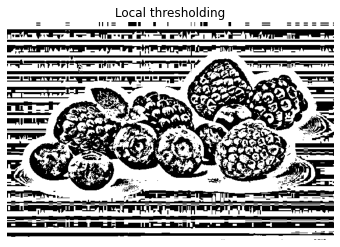

In [13]:
# Import the local threshold function
from skimage.filters import threshold_local

# Make the image grayscale using rgb2gray
fruits_gray = color.rgb2gray(fruits)

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(fruits_gray, block_size, offset=0)

# Obtain the binary image by applying local thresholding
binary_local = fruits_gray > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

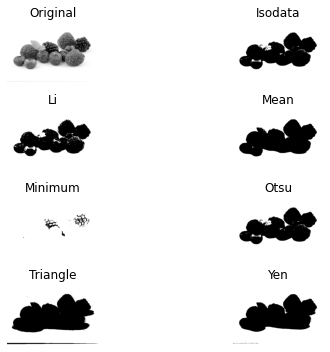

In [14]:
# Import the try all function
from skimage.filters import try_all_threshold

# Use the try all method on the grayscale image
fig, ax = try_all_threshold(fruits_gray, verbose=False)

# Show the resulting plots
plt.show()

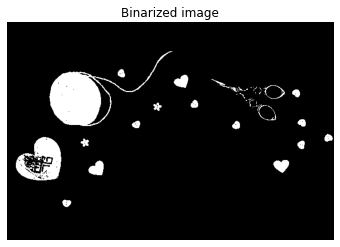

In [15]:
tools_image = plt.imread('data/shapes52.jpg')

# Turn the image grayscale
gray_tools_image = color.rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

## Filters

1. Enhancing an image
2. Emphasize or remove features
3. Smoothing
4. Sharpening
5. Edge detection


### Edge detection

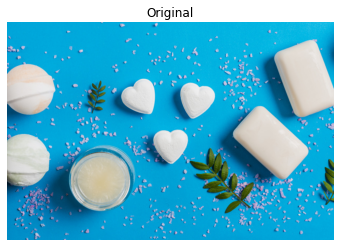

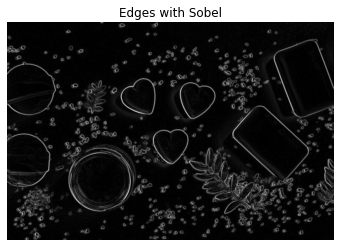

In [16]:
soaps_image = plt.imread('data/soaps.jpg')

# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")

In [17]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

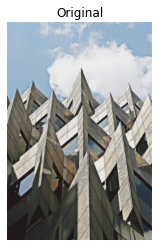

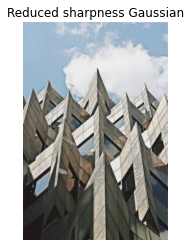

In [18]:
building_image = plt.imread('data/toa-sharp-def-3.jpg')

# Import Gaussian filter 
from skimage.filters import gaussian

# Apply filter
gaussian_image = gaussian(building_image, multichannel=True)

# Show original and resulting image to compare
show_image(building_image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")

### Contrast enhancement

What's the contrast of this image?

Just as we saw previously, you can calculate the contrast by calculating the range of the pixel intensities i.e. by subtracting the minimum pixel intensity value from the histogram to the maximum one.

In [19]:
desktop = plt.imread('data/desktop.jpg')
np.max(desktop) - np.min(desktop)

255

In [20]:
chest_xray_image = plt.imread('data/contrast_00000109_005.png')

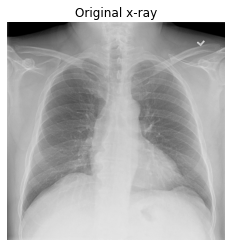

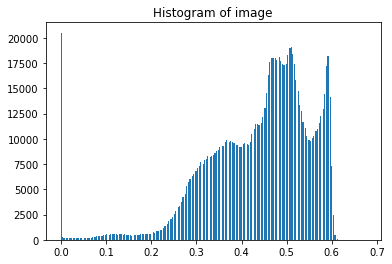

In [21]:
# Import the required module
from skimage import exposure

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

In [22]:
# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

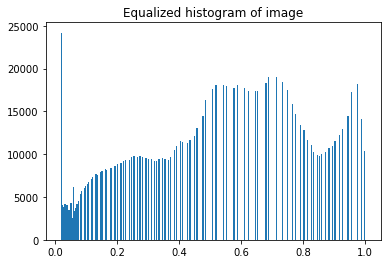

In [23]:
plt.title('Equalized histogram of image')
plt.hist(xray_image_eq.ravel(), bins=256)
plt.show()

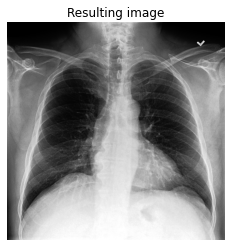

In [24]:
# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

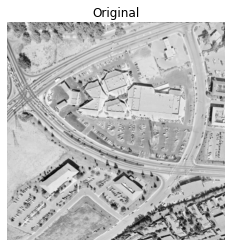

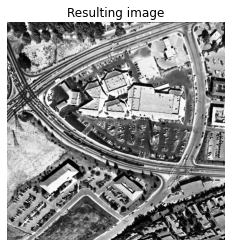

In [25]:
image_aerial = plt.imread('data/5.2.09.png')

# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_hist(image_aerial)

# Show the original and resulting image
show_image(image_aerial, 'Original')
show_image(image_eq, 'Resulting image')

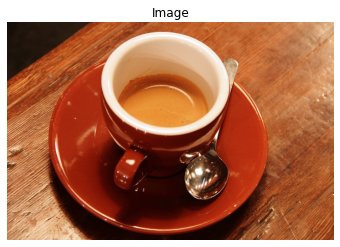

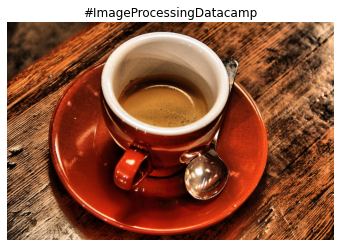

In [26]:
# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image)
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')